## Connectome Quality Control and Preprocessing

This workbook contains all scripts for quality controlling the obtained connectomes and normalising them prior to further analysis.

Author: Angelika Zarkali
Date last updated: 11th June 2019

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro
from math import exp,sqrt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
from pathlib import Path

# Enable inline plotting
%matplotlib inline

#### Quality Control Connectomes

First we will visualise each connectome sequentially (by changing the VIPD ID number).
Connectomes should generally follow the following rules:
- High SC between spatially close regions (diagonal line)
- High SC within each hemisphere (2 squares, L top and R bottom)
- High SC from subcortical regions (bottom line)
- Some SC between homolog regions (upper diagonal line).

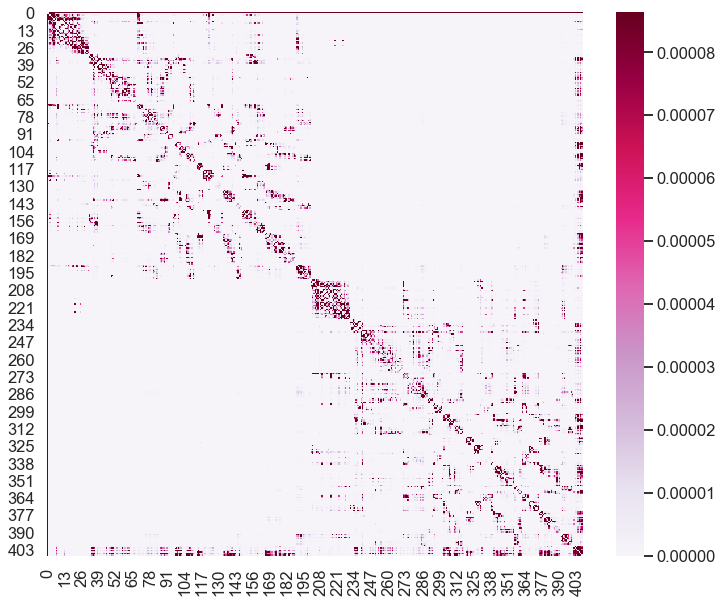

In [22]:
# Quality control 
path = r"Data\shaefer_connectome.csv" # path to your raw connectome

sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(12, 10))

data = pd.read_csv(path, header=None)
fig = sns.heatmap(data, robust=True, cbar=True, cmap="PuRd")
#sns.despine

Then we will review the total number of connections across participants to check these are on the same scale

In [24]:
### Change VIPD number to go through each participant
data = pd.read_csv(path, header=None, sep=" ")
d = data.values.flatten() ## converts matrix to a unidimensional array of values
nd = np.nonzero(d) ## drop all the zeros
len(nd[0]) ## number of non-zero values aka connections in the matrix

408

#### Normalise connectomes

Here we will normalise the connectome matrices for each participant. 
This is done by dividing the matrix with the sum of the total connections.

In [3]:
### Normalise connectomes
### Read in the clinical data
df = pd.read_excel(r"Data/Participants.csv")
participantList = df.Participants

data_folder = Path(r"Data\Connectomes") ### path to your raw connectomes
### Loop through all participants
for i in range(0,len(participantList)):
    path = data_folder / participantList[i] / "shaefer_connectome.csv"
    data = pd.read_csv(path, header=None, sep=" ")
    sum = data.values.sum()
    data = data.div(sum)
    export_path = data_folder / participantList[i] / "connectome_norm.csv"
    data.to_csv(export_path)